In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [14]:
from tools.BET import BETheory
from tools.BEM import BEMTheory
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
rBlade = 0.85  #m  Radius of the blade(rough estimate) : The estimate is made looking at this data: https://uav-en.tmotor.com/html/2019/Motor_1016/294.html
R_co = 0.15
angular_vel = 750*2*np.pi/60
V = 0
areaBlade = np.pi*(rBlade**2)
roAir = 1.225
T_air = 15*9.8
ind_vel = np.sqrt(T_air/(2*roAir*areaBlade))

In [25]:
def ct_results(tita,b, sigma): 
    tita_degree = tita
    lift_slope = 5.75
    sigma = sigma
    b = b
    def linear_twist(r_ratio):
        return tita_degree*np.pi/180
    def drag_aoa(AoA):
        return 0.0113 + 1.25* AoA**2
    def linear_taper(r_ratio):
        return sigma*np.pi*rBlade/b
    rotor_1 = BEMTheory(
                angular_vel = angular_vel, no_of_blades= b, 
                radius= rBlade, lift_slope=lift_slope, drag = drag_aoa, linear_twist=linear_twist, 
                climb_vel=V , root_cutouts=R_co, linear_taper=linear_taper)
    rotor_2 = BETheory(
                angular_vel = angular_vel, no_of_blades= b, chord_mean=sigma*np.pi*rBlade/b,
                radius= rBlade, lift_slope=lift_slope, linear_twist=linear_twist, 
                climb_vel=V ,induced_vel= ind_vel, root_cutouts=R_co)
    return ((rotor_1.C_T() , rotor_2.C_T()), (rotor_1.C_Q() , rotor_2.C_Q()))

Text(0.5, 1.0, 'CT vs θ_0 plots: B.E.T, B.E.M.T, experimental results')

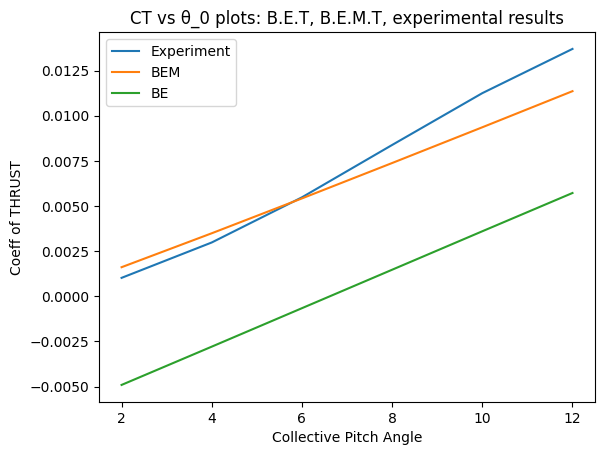

In [33]:
tita_angles = [2,4,6,8,10,12]
ct_experiment = [0.00102, 0.00298, 0.00548, 0.00838, 0.01125, 0.01370]
ct_bem = [ct_results(tita_angles[i], 3, 0.0636)[0][0] for i in range(6)]
ct_be = [ct_results(tita_angles[i], 3, 0.0636)[0][1] for i in range(6)]
plt.plot(tita_angles, ct_experiment )
plt.plot(tita_angles, ct_bem)
plt.plot(tita_angles, ct_be)
plt.legend(['Experiment', 'BEM', 'BE'])
plt.xlabel('Collective Pitch Angle')
plt.ylabel('Coeff of THRUST')
plt.title('CT vs θ_0 plots: B.E.T, B.E.M.T, experimental results')

Text(0.5, 1.0, 'CQ vs θ_0 plots: B.E.T, B.E.M.T, experimental results')

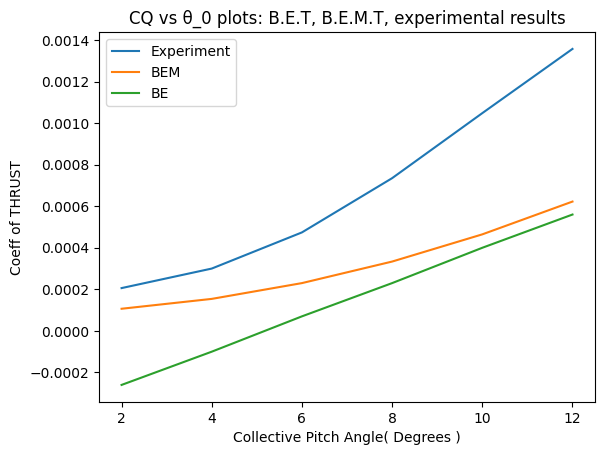

In [35]:
tita_angles = [2,4,6,8,10,12]
cq_experiment = [0.000206, 0.000300, 0.000474, 0.000735, 0.001048, 0.001357]
cq_bem = [ct_results(tita_angles[i], 3, 0.0636)[1][0] for i in range(6)]
cq_be = [ct_results(tita_angles[i], 3, 0.0636)[1][1] for i in range(6)]
plt.plot(tita_angles, cq_experiment)
plt.plot(tita_angles, cq_bem)
plt.plot(tita_angles, cq_be)
plt.legend(['Experiment', 'BEM', 'BE'])
plt.xlabel('Collective Pitch Angle( Degrees )')
plt.ylabel('Coeff of THRUST')
plt.title('CQ vs θ_0 plots: B.E.T, B.E.M.T, experimental results')

In [18]:
def error_tolerance(list_1, list_2):
    a1 = np.array(list_1)
    a2 = np.array(list_2)
    for element in a1-a2:
        if abs(element) > 2.55e-3:
            return False
    return True

In [28]:
tita_angles = [2,4,6,8,10,12]
b_values = [2,3,4,5]
sigma_values = [0.0424, 0.0636, 0.0849, 0.1061]
# Table I
ct_expet_1 = [0.000873, 0.00248, 0.00442, 0.00650, 0.00847, 0.00990]
ct_1 = [ct_results(tita_angles[i], b_values[0], sigma_values[0])[0][0] for i in range(6)]
if error_tolerance(ct_expet_1, ct_1):
    print('Table I is passed')
else:
    print('Error is high here')
# Table II
ct_expet_2 = [0.00102, 0.00298, 0.00548, 0.00838, 0.01125, 0.01370]
ct_2 = [ct_results(tita_angles[i], b_values[1], sigma_values[1])[0][0] for i in range(6)]
if error_tolerance(ct_expet_2, ct_2):
    print('Table II is passed')
else:
    print('Error is high here')
# Table II
ct_expet_3 = [0.001042, 0.00338, 0.00645, 0.00981, 0.01382, 0.01745]
ct_3 = [ct_results(tita_angles[i], b_values[2], sigma_values[2])[0][0] for i in range(6)]
if error_tolerance(ct_expet_3, ct_3):
    print('Table III is passed')
else:
    print('Error is high here')
# Table IV
ct_expet_4 = [0.001181, 0.00362, 0.00694, 0.01103, 0.01548, 0.0200]
ct_4 = [ct_results(tita_angles[i], b_values[3], sigma_values[3])[0][0] for i in range(6)]
if error_tolerance(ct_expet_4, ct_4):
    print('Table IV is passed')
else:
    print('Error is high here')

Table I is passed
Table II is passed
Table III is passed
Table IV is passed


So I conclude that My Blade Element theory class produces C_T values with *_2.55e-3_* error, compared to the [paper](https://ntrs.nasa.gov/api/citations/19930081433/downloads/19930081433.pdf)